## Importação e overview

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os dados
df = pd.read_csv('../data/churn_data.csv')
df.head()

,id,idade,tempo_cliente,mensalidade,suporte_ligacoes,tem_servico_extra,pagamento_em_dia,churn
0,1,56,28,117.26,9,0,1,1
1,2,69,48,157.89,8,0,1,1
2,3,46,38,149.42,0,0,1,1
3,4,32,31,134.51,4,0,1,1
4,5,60,14,167.58,4,0,1,0


## Análise geral da base

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   idade              10000 non-null  int64  
 2   tempo_cliente      10000 non-null  int64  
 3   mensalidade        10000 non-null  float64
 4   suporte_ligacoes   10000 non-null  int64  
 5   tem_servico_extra  10000 non-null  int64  
 6   pagamento_em_dia   10000 non-null  int64  
 7   churn              10000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 625.1 KB


,id,idade,tempo_cliente,mensalidade,suporte_ligacoes,tem_servico_extra,pagamento_em_dia,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,46.166100,35.972300,131.209157,4.585500,0.393000,0.879800,0.335900
std,2886.89568,16.421738,20.466226,40.297779,2.853157,0.488441,0.325212,0.472328
min,1.00000,18.000000,1.000000,60.010000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,32.000000,18.000000,96.657500,2.000000,0.000000,1.000000,0.000000
50%,5000.50000,46.000000,36.000000,131.880000,5.000000,0.000000,1.000000,0.000000
75%,7500.25000,61.000000,54.000000,165.622500,7.000000,1.000000,1.000000,1.000000
max,10000.00000,74.000000,71.000000,199.990000,9.000000,1.000000,1.000000,1.000000


Distribuição de Churn

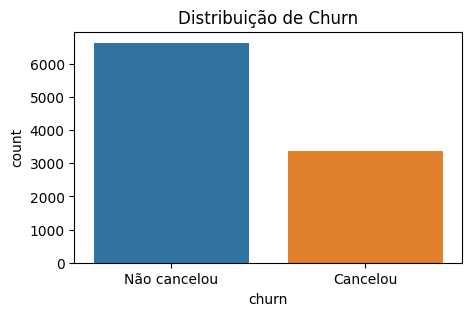

Taxa de churn na base: 33.6%


In [4]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='churn')
plt.xticks([0,1], ['Não cancelou', 'Cancelou'])
plt.title('Distribuição de Churn')
plt.show()

churn_rate = df['churn'].mean()
print(f'Taxa de churn na base: {churn_rate:.1%}')

## Explorando variáveis numéricas

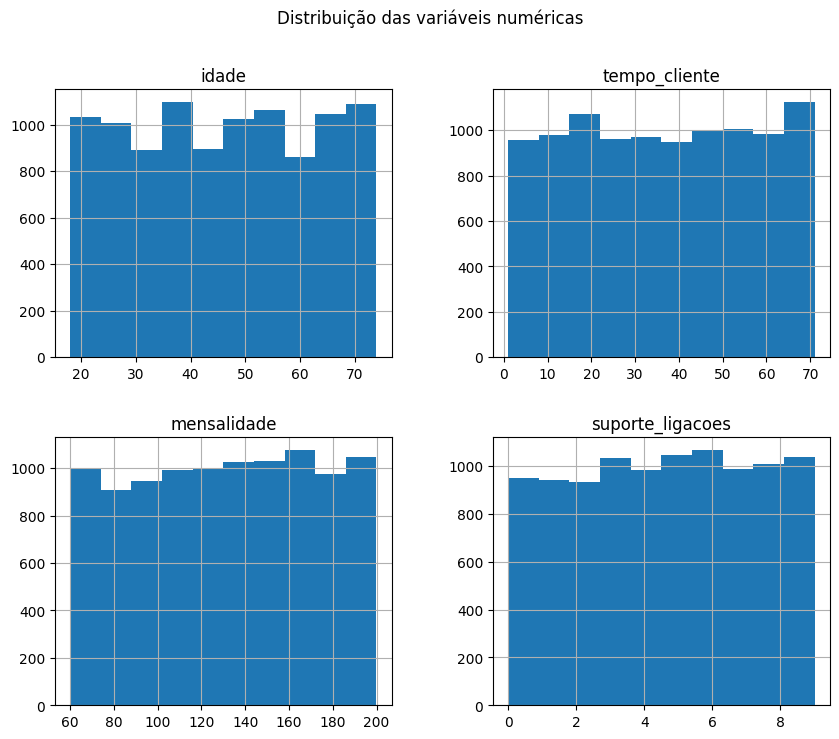

In [5]:
df[['idade', 'tempo_cliente', 'mensalidade', 'suporte_ligacoes']].hist(figsize=(10,8))
plt.suptitle('Distribuição das variáveis numéricas')
plt.show()


## Churn por variáveis categóricas

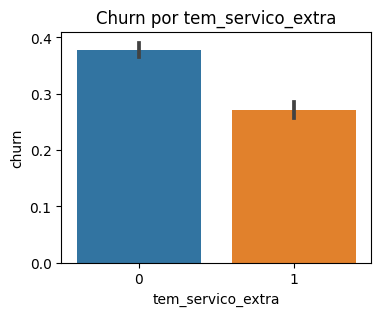

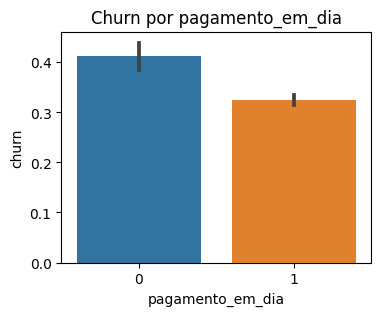

In [6]:
for col in ['tem_servico_extra', 'pagamento_em_dia']:
    plt.figure(figsize=(4,3))
    sns.barplot(x=col, y='churn', data=df)
    plt.title(f'Churn por {col}')
    plt.show()


## Boxplots:

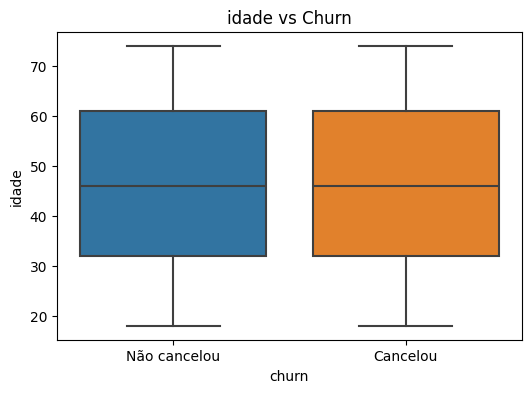

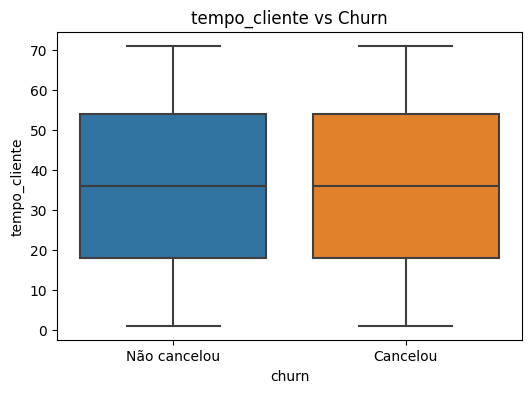

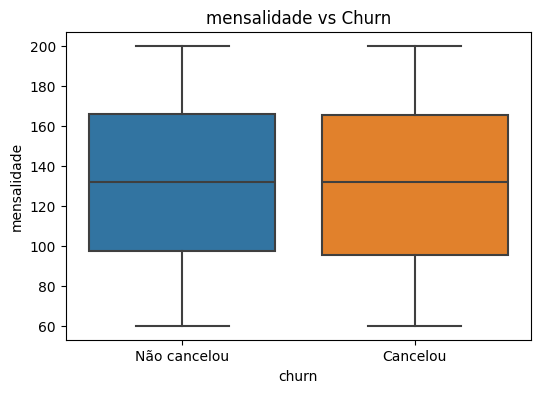

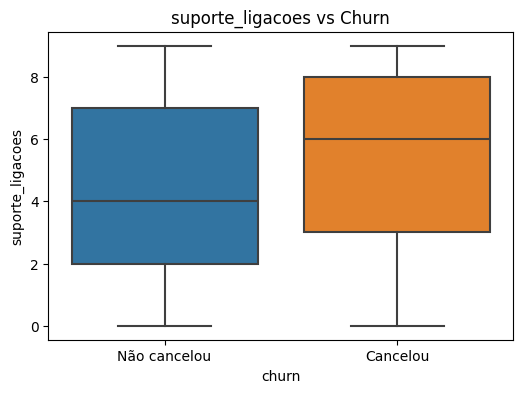

In [7]:
for col in ['idade', 'tempo_cliente', 'mensalidade', 'suporte_ligacoes']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df)
    plt.xticks([0,1], ['Não cancelou', 'Cancelou'])
    plt.title(f'{col} vs Churn')
    plt.show()


## Correlação

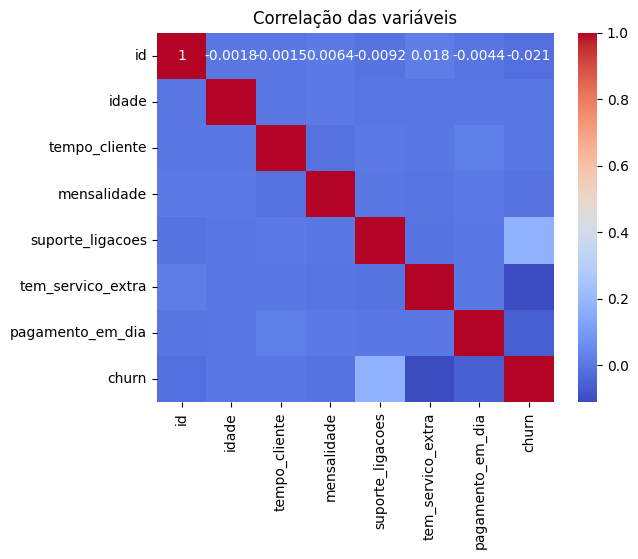

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação das variáveis')
plt.show()


## Pré-processamento (split e features)

In [9]:
from sklearn.model_selection import train_test_split

# Define features e target
X = df.drop(columns=['id', 'churn'])
y = df['churn']

# Split em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)


(7500, 6) (2500, 6)
